In [131]:
import pandas as pd
import numpy as np
import time
from pandas import Series
from matplotlib.pyplot import figure
import matplotlib.pylab as plt
from matplotlib import pyplot
%matplotlib inline
from datetime import datetime, timedelta
import re
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels import tsa
from statsmodels.tsa.stattools import acf, pacf
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [132]:
df = pd.read_csv('Crime_Data.csv')
df.head

<bound method NDFrame.head of          Report Number Occurred Date  Occurred Time Reported Date  \
0       20080000465209    12/13/1908         2114.0    12/13/2008   
1       20100000202011    06/15/1964            0.0    06/15/2010   
2        2012000023437    01/01/1973            0.0    01/25/2012   
3       20130000327785    06/01/1974            0.0    09/09/2013   
4       20160000289384    01/01/1975            0.0    08/11/2016   
5        1975000079415    12/16/1975          900.0    12/16/1975   
6        1976000069169    01/01/1976            1.0    01/31/1976   
7       20170000474905    07/01/1976          800.0    12/27/2017   
8       20180000183590    01/01/1977            0.0    05/22/2018   
9       20090000300201    01/01/1978            1.0    08/25/2009   
10       1979000049118    01/28/1979         1600.0    02/09/1979   
11      20100000323749    07/04/1979            0.0    09/15/2010   
12      20100000177050    01/01/1980          952.0    05/28/2010   
13  

In [133]:
df=pd.DataFrame(df)
#s = df[['Occurred Date', 'Primary Offense Description']]
s = df[['Occurred Date', 'Crime Subcategory']]
s.dtypes
s.shape


(489631, 2)

In [134]:
#s.head()
#(s['Primary Offense Description'].value_counts()>3400)
s['Crime Subcategory'].value_counts()

CAR PROWL                              139827
THEFT-ALL OTHER                         50527
THEFT-SHOPLIFT                          45509
BURGLARY-RESIDENTIAL                    44498
MOTOR VEHICLE THEFT                     41040
BURGLARY-COMMERCIAL                     21661
THEFT-BUILDING                          19998
NARCOTIC                                16643
TRESPASS                                15268
AGGRAVATED ASSAULT                      14297
DUI                                     12010
ROBBERY-STREET                          11269
THEFT-BICYCLE                           10476
BURGLARY-RESIDENTIAL-SECURE PARKING      7896
FAMILY OFFENSE-NONVIOLENT                6479
AGGRAVATED ASSAULT-DV                    6437
SEX OFFENSE-OTHER                        5893
WEAPON                                   4657
ROBBERY-COMMERCIAL                       4193
PROSTITUTION                             3522
RAPE                                     1802
LIQUOR LAW VIOLATION              

In [135]:
s['date'] = pd.to_datetime(s['Occurred Date'],infer_datetime_format=True)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [136]:
s.head()

,Occurred Date,Crime Subcategory,date
0,12/13/1908,DUI,1908-12-13
1,06/15/1964,FAMILY OFFENSE-NONVIOLENT,1964-06-15
2,01/01/1973,SEX OFFENSE-OTHER,1973-01-01
3,06/01/1974,SEX OFFENSE-OTHER,1974-06-01
4,01/01/1975,SEX OFFENSE-OTHER,1975-01-01


In [137]:
s['date2']=s['date']
s.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Occurred Date,Crime Subcategory,date,date2
0,12/13/1908,DUI,1908-12-13,1908-12-13
1,06/15/1964,FAMILY OFFENSE-NONVIOLENT,1964-06-15,1964-06-15
2,01/01/1973,SEX OFFENSE-OTHER,1973-01-01,1973-01-01
3,06/01/1974,SEX OFFENSE-OTHER,1974-06-01,1974-06-01
4,01/01/1975,SEX OFFENSE-OTHER,1975-01-01,1975-01-01


In [138]:
cp = s[s['Crime Subcategory'].isin(['CAR PROWL'])]
cp.head()                                          

,Occurred Date,Crime Subcategory,date,date2
10,01/28/1979,CAR PROWL,1979-01-28,1979-01-28
42,12/08/1996,CAR PROWL,1996-12-08,1996-12-08
63,03/25/1998,CAR PROWL,1998-03-25,1998-03-25
89,01/05/2000,CAR PROWL,2000-01-05,2000-01-05
90,01/08/2000,CAR PROWL,2000-01-08,2000-01-08


In [139]:
mask = (cp['date'] > '2007-12-31')
cpdaily = cp.loc[mask]
cpdaily.head()
cpdaily['Crime Subcategory'].value_counts()

CAR PROWL    139687
Name: Crime Subcategory, dtype: int64

In [140]:
cpgroup = cpdaily.groupby(['date']).count()
cpgroup.head()
#propertyall.describe()

,Occurred Date,Crime Subcategory,date2
date,,,
2008-01-01,25,25,25
2008-01-02,32,32,32
2008-01-03,33,33,33
2008-01-04,33,33,33
2008-01-05,22,22,22


In [141]:
#cp = cp.set_index('date')
cpdaily = cpgroup['Crime Subcategory']
cpdaily

date
2008-01-01    25
2008-01-02    32
2008-01-03    33
2008-01-04    33
2008-01-05    22
2008-01-06    25
2008-01-07    26
2008-01-08    28
2008-01-09    40
2008-01-10    25
2008-01-11    37
2008-01-12    44
2008-01-13    24
2008-01-14    30
2008-01-15    20
2008-01-16    33
2008-01-17    36
2008-01-18    22
2008-01-19    26
2008-01-20    30
2008-01-21    21
2008-01-22    21
2008-01-23    27
2008-01-24    43
2008-01-25    25
2008-01-26    27
2008-01-27    32
2008-01-28    19
2008-01-29    25
2008-01-30    16
              ..
2018-07-30    32
2018-07-31    45
2018-08-01    34
2018-08-02    43
2018-08-03    33
2018-08-04    31
2018-08-05    47
2018-08-06    26
2018-08-07    22
2018-08-08    47
2018-08-09    30
2018-08-10    32
2018-08-11    25
2018-08-12    31
2018-08-13    34
2018-08-14    34
2018-08-15    32
2018-08-16    28
2018-08-17    39
2018-08-18    36
2018-08-19    25
2018-08-20    39
2018-08-21    30
2018-08-22    22
2018-08-23    34
2018-08-24    30
2018-08-25    31
2018-08-2

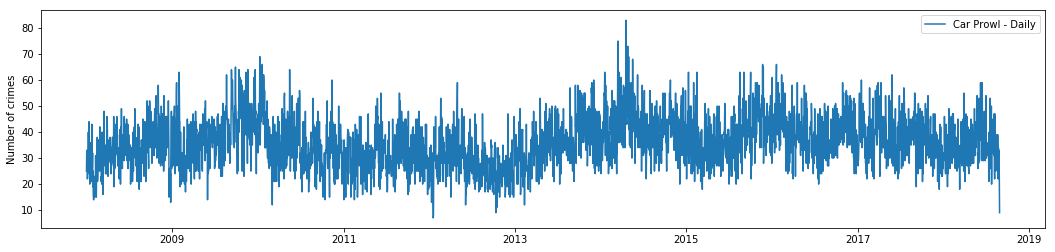

In [142]:
#fig, ax = plt.subplots(1, 1, figsize=(12, 14))
# b.plot(subplots=False, figsize=(15, 6)); plt.legend(loc='best')
# plt.xlabel('date')
x = cpdaily
plt.figure(figsize=[18,4]) 

plt.plot(x, label = 'Car Prowl - Daily')
plt.ylabel('Number of crimes')

plt.legend(loc='best')

In [143]:
cpweek = cpdaily.resample('W').sum()
cpweek

date
2008-01-06    170
2008-01-13    224
2008-01-20    197
2008-01-27    196
2008-02-03    130
2008-02-10    150
2008-02-17    164
2008-02-24    201
2008-03-02    230
2008-03-09    199
2008-03-16    212
2008-03-23    217
2008-03-30    225
2008-04-06    216
2008-04-13    228
2008-04-20    211
2008-04-27    245
2008-05-04    219
2008-05-11    261
2008-05-18    211
2008-05-25    200
2008-06-01    254
2008-06-08    233
2008-06-15    276
2008-06-22    243
2008-06-29    247
2008-07-06    229
2008-07-13    204
2008-07-20    212
2008-07-27    257
             ... 
2018-02-11    252
2018-02-18    276
2018-02-25    231
2018-03-04    225
2018-03-11    192
2018-03-18    240
2018-03-25    249
2018-04-01    239
2018-04-08    239
2018-04-15    243
2018-04-22    208
2018-04-29    251
2018-05-06    255
2018-05-13    263
2018-05-20    244
2018-05-27    306
2018-06-03    228
2018-06-10    290
2018-06-17    306
2018-06-24    246
2018-07-01    284
2018-07-08    225
2018-07-15    234
2018-07-22    253
2018-

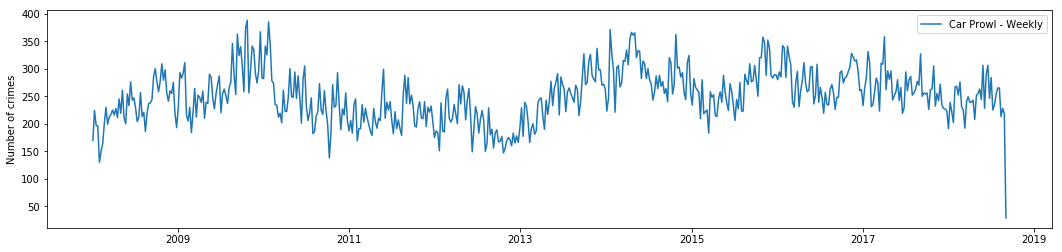

In [144]:
x = cpweek
plt.figure(figsize=[18,4]) 

plt.plot(x, label = 'Car Prowl - Weekly')
plt.ylabel('Number of crimes')

plt.legend(loc='best')

In [145]:
cpmonth = cpdaily.resample('M').sum()


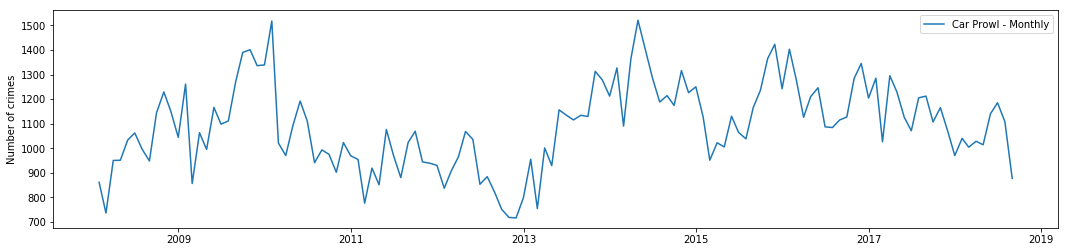

In [146]:
x = cpmonth
plt.figure(figsize=[18,4]) 

plt.plot(x, label = 'Car Prowl - Monthly')
plt.ylabel('Number of crimes')

plt.legend(loc='best')

In [147]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=3).mean()
    rolstd = timeseries.rolling(window=3).std()

    #Plot rolling statistics:
    plt.figure(figsize=[18,4]) 
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

Car Prowl Daily


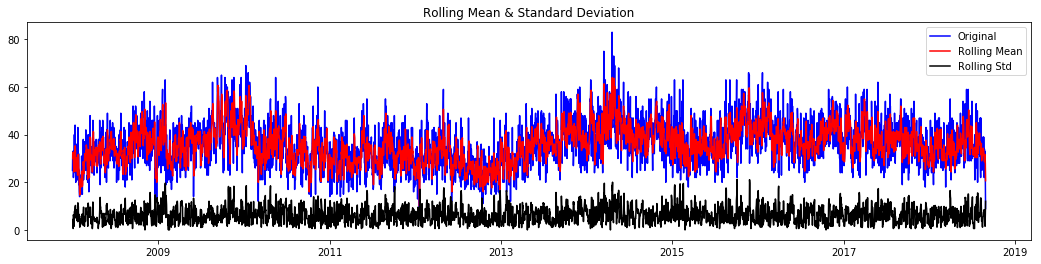

Results of Dickey-Fuller Test:
Test Statistic                   -4.750381
p-value                           0.000068
#Lags Used                       28.000000
Number of Observations Used    3864.000000
Critical Value (1%)              -3.432043
Critical Value (5%)              -2.862288
Critical Value (10%)             -2.567168
dtype: float64


In [148]:
print('Car Prowl Daily')
test_stationarity(cpdaily)


Car Prowl Weekly


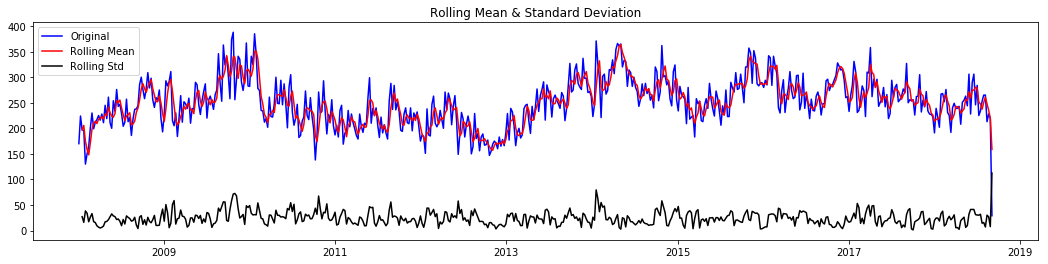

Results of Dickey-Fuller Test:
Test Statistic                  -3.314461
p-value                          0.014244
#Lags Used                       7.000000
Number of Observations Used    549.000000
Critical Value (1%)             -3.442317
Critical Value (5%)             -2.866819
Critical Value (10%)            -2.569582
dtype: float64


In [149]:
print('Car Prowl Weekly')
test_stationarity(cpweek)


Car Prowl Monthly


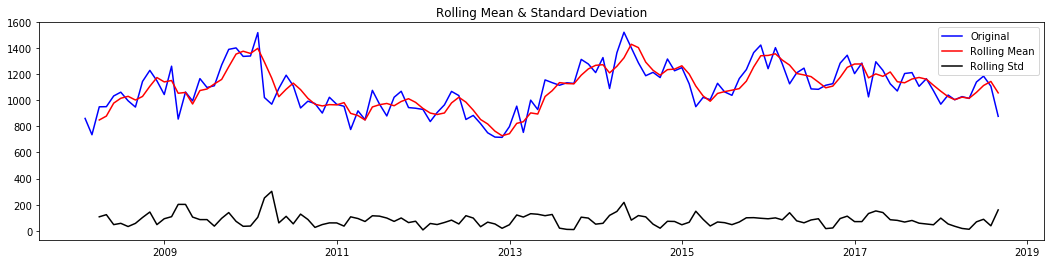

Results of Dickey-Fuller Test:
Test Statistic                  -3.629104
p-value                          0.005228
#Lags Used                       1.000000
Number of Observations Used    126.000000
Critical Value (1%)             -3.483346
Critical Value (5%)             -2.884766
Critical Value (10%)            -2.579156
dtype: float64


In [150]:
print('Car Prowl Monthly')
test_stationarity(cpmonth)


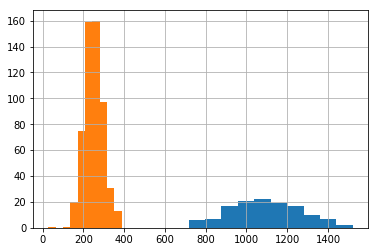

In [151]:
cpmonth.hist()
cpweek.hist()

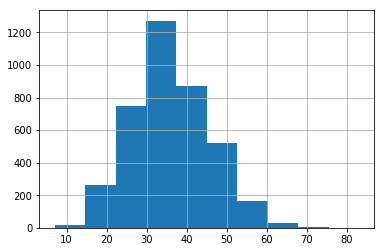

In [152]:
cpdaily.hist()

In [153]:
mask = (cp['date'] > '2016-12-31') & (cp['date'] < '2018-01-01')
cpdaily2017 = cp.loc[mask]
cpdaily2017.head()
# cpdaily['Crime Subcategory'].value_counts()

,Occurred Date,Crime Subcategory,date,date2
320001,06/26/2017,CAR PROWL,2017-06-26,2017-06-26
320006,06/26/2017,CAR PROWL,2017-06-26,2017-06-26
320007,06/26/2017,CAR PROWL,2017-06-26,2017-06-26
320008,06/26/2017,CAR PROWL,2017-06-26,2017-06-26
320009,06/26/2017,CAR PROWL,2017-06-26,2017-06-26


In [154]:
cpgroup2017 = cpdaily2017.groupby(['date']).count()
cpgroup2017.head()
#propertyall.describe()

,Occurred Date,Crime Subcategory,date2
date,,,
2017-01-01,30,30,30
2017-01-02,27,27,27
2017-01-03,29,29,29
2017-01-04,30,30,30
2017-01-05,34,34,34


In [155]:
cpdaily2017 = cpgroup2017['Crime Subcategory']
cpdaily2017

date
2017-01-01    30
2017-01-02    27
2017-01-03    29
2017-01-04    30
2017-01-05    34
2017-01-06    39
2017-01-07    51
2017-01-08    55
2017-01-09    38
2017-01-10    37
2017-01-11    44
2017-01-12    38
2017-01-13    36
2017-01-14    50
2017-01-15    41
2017-01-16    60
2017-01-17    47
2017-01-18    50
2017-01-19    34
2017-01-20    51
2017-01-21    39
2017-01-22    50
2017-01-23    46
2017-01-24    51
2017-01-25    38
2017-01-26    43
2017-01-27    47
2017-01-28    48
2017-01-29    38
2017-01-30    34
              ..
2017-12-02    33
2017-12-03    34
2017-12-04    39
2017-12-05    30
2017-12-06    35
2017-12-07    21
2017-12-08    33
2017-12-09    37
2017-12-10    33
2017-12-11    35
2017-12-12    32
2017-12-13    29
2017-12-14    18
2017-12-15    29
2017-12-16    41
2017-12-17    43
2017-12-18    24
2017-12-19    34
2017-12-20    42
2017-12-21    29
2017-12-22    33
2017-12-23    34
2017-12-24    27
2017-12-25    23
2017-12-26    35
2017-12-27    23
2017-12-28    26
2017-12-2

Car Prowl Daily 2017


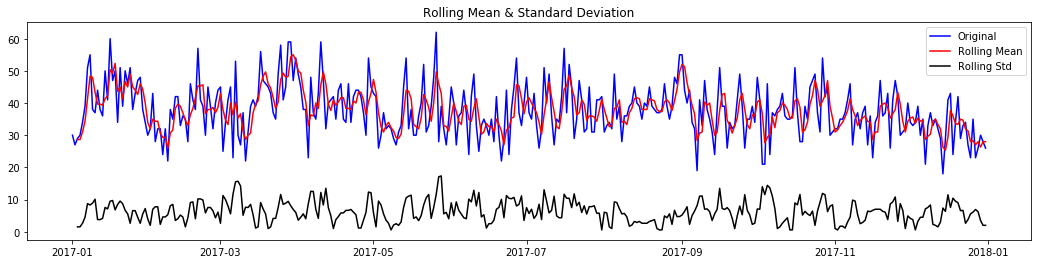

Results of Dickey-Fuller Test:
Test Statistic                  -3.495183
p-value                          0.008112
#Lags Used                      11.000000
Number of Observations Used    353.000000
Critical Value (1%)             -3.449011
Critical Value (5%)             -2.869763
Critical Value (10%)            -2.571151
dtype: float64


In [156]:
print('Car Prowl Daily 2017')
test_stationarity(cpdaily2017)

In [157]:
cpweekly2017 = cpdaily2017.resample('W').sum()

Car Prowl Weekly 2017


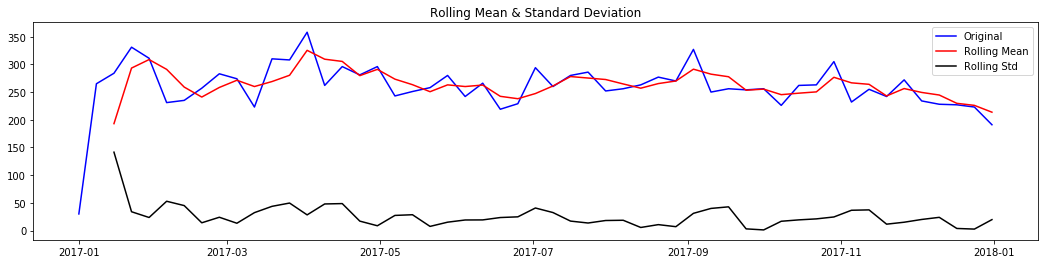

Results of Dickey-Fuller Test:
Test Statistic                 -2.567378
p-value                         0.099929
#Lags Used                      3.000000
Number of Observations Used    49.000000
Critical Value (1%)            -3.571472
Critical Value (5%)            -2.922629
Critical Value (10%)           -2.599336
dtype: float64


In [158]:
print('Car Prowl Weekly 2017')
test_stationarity(cpweekly2017)

In [159]:
cpmonthly2017 = cpdaily2017.resample('M').sum()

Car Prowl Monthly 2017


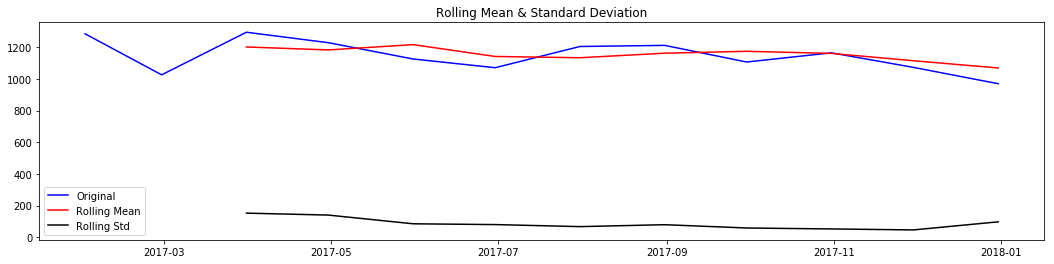

Results of Dickey-Fuller Test:
Test Statistic                -0.000000
p-value                        0.958532
#Lags Used                     7.000000
Number of Observations Used    4.000000
Critical Value (1%)           -7.355441
Critical Value (5%)           -4.474365
Critical Value (10%)          -3.126933
dtype: float64


/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1510: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


In [160]:
print('Car Prowl Monthly 2017')
test_stationarity(cpmonthly2017)

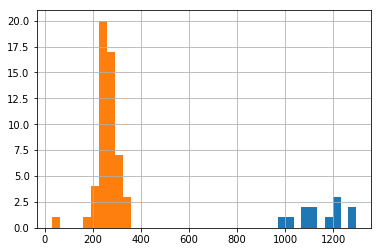

In [161]:
cpmonthly2017.hist()
cpweekly2017.hist()

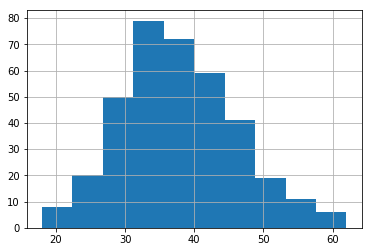

In [162]:
cpdaily2017.hist()

In [163]:
cpgroup['date'] = cpgroup.index
cpgroup.tail()

,Occurred Date,Crime Subcategory,date2,date
date,,,,
2018-08-24,30,30,30,2018-08-24
2018-08-25,31,31,31,2018-08-25
2018-08-26,33,33,33,2018-08-26
2018-08-27,20,20,20,2018-08-27
2018-08-28,9,9,9,2018-08-28


In [164]:
cpgroup['date'] = ([x.toordinal() for x in cpgroup['date']])

In [165]:
# import time
# from datetime import datetime
# cpgroup['dates']=([x.strftime("%y%m%d") for x in cpgroup['date']]) #timestamp to string
# cpgroup['daten']=([int(x) for x in cpgroup['dates']]) #string to datetime with integer format'
# cpgroup['daten'].dtype

In [166]:
cpgroup['Crime_Subcategory']=cpgroup['Crime Subcategory']

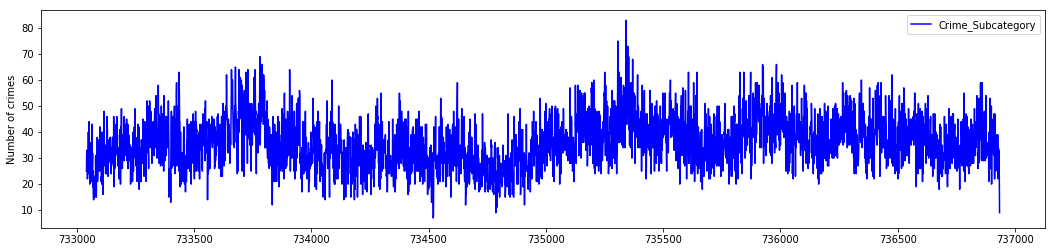

In [167]:
plt.figure(figsize=[18,4]) 
plt.plot(cpgroup['date'],cpgroup['Crime_Subcategory'], c = 'blue')
plt.ylabel('Number of crimes')
plt.legend(loc='best')

In [168]:
model1 = smf.ols('Crime_Subcategory ~ date',data=cpgroup)
fit1 = model1.fit()
fit1.summary()                 
  

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Crime_Subcategory   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     96.40
Date:                Sat, 01 Sep 2018   Prob (F-statistic):           1.71e-22
Time:                        22:21:34   Log-Likelihood:                -14280.
No. Observations:                3893   AIC:                         2.856e+04
Df Residuals:                    3891   BIC:                         2.858e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -940.1054     99.404     -9.457      0.000   -1134.994    -745.216
date           0.0013      0.000      9.818      0.000       0.001       0.002
==============================================================================
Omnibus:                      105.574   Durbin-Watson:                   1.154
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              113.991
Skew:                           0.404   Prob(JB):                     1.77e-25
Kurtosis:                       3.223   Cond. No.                     4.81e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.81e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

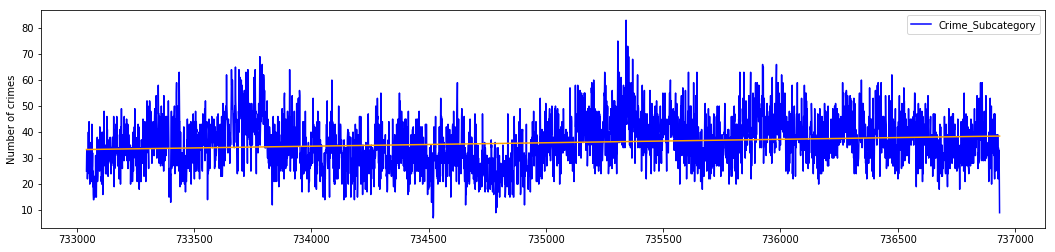

In [169]:
y = cpgroup['Crime_Subcategory']
X = cpgroup['date']

y_pred = fit1.predict(X)

plt.figure(figsize=[18,4]) 
plt.plot(X,y, c = 'blue')
plt.plot(X,y_pred, c = 'orange')
plt.ylabel('Number of crimes')
plt.legend(loc='best')



In [170]:
print(mean_squared_error(y,y_pred))

89.88666881127261


In [171]:
Xdf = pd.DataFrame (cpgroup['date'])

In [172]:
degree=3
est = make_pipeline(PolynomialFeatures(degree), StandardScaler(),LinearRegression())
est.fit(Xdf,y)
y_pred = est.predict(Xdf)

print(mean_squared_error(y, y_pred))

87.83790346165257


In [173]:
est1 = LinearRegression()
degree = 3
p = PolynomialFeatures(degree)
a = p.fit_transform(Xdf)
s = StandardScaler()
s.fit(a)
Xdf = s.transform(a)
est1.fit(Xdf, y)

y_pred = est1.predict(Xdf)

print(est1.coef_)
#print(mean_squared_error(y, y_pred))

[       0.         -2329120.47490874  4658067.29737599 -2328946.41908469]


<Figure size 432x288 with 0 Axes>

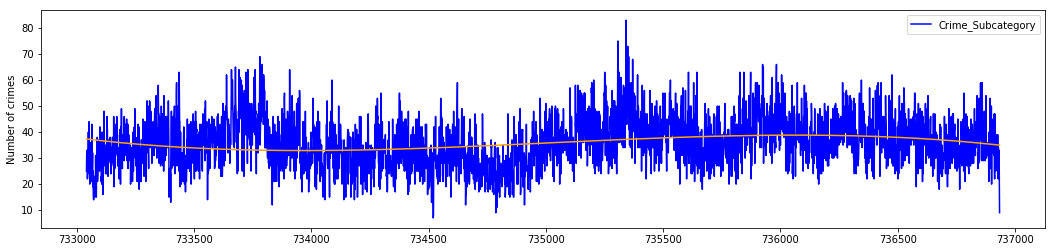

In [174]:
plt.gcf().clear()
plt.figure(figsize=[18,4]) 
plt.plot(X,y, c = 'blue')
plt.plot(X,y_pred, c = 'orange')
plt.ylabel('Number of crimes')
plt.legend(loc='best')


In [175]:
Xdf = pd.DataFrame (cpgroup['date'])
est2 = LinearRegression()
degree = 9
p2 = PolynomialFeatures(degree)
a2 = p3.fit_transform(Xdf)
s2 = StandardScaler()
s2.fit(a2)
Xdf = s2.transform(a3)
est2.fit(Xdf, y)

y_pred = est2.predict(Xdf)

print(est2.coef_)
print(mean_squared_error(y, y_pred))

[ 0.00000000e+00  2.94353835e+12 -9.86957464e+12  9.47887139e+12
  2.28364631e+12 -1.07585101e+13  1.12204394e+13 -9.28777743e+12
  5.19553296e+12 -1.20616623e+12]
78.83497955559142


<Figure size 432x288 with 0 Axes>

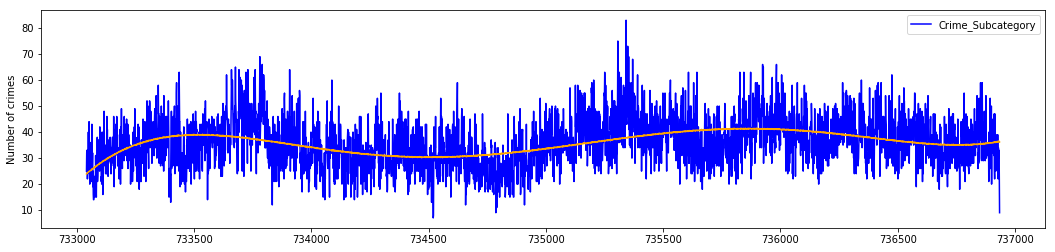

In [176]:
plt.gcf().clear()
plt.figure(figsize=[18,4]) 
plt.plot(X,y, c = 'blue')
plt.plot(X,y_pred, c = 'orange')
plt.ylabel('Number of crimes')
plt.legend(loc='best')


In [177]:
model3 = smf.ols('Crime_Subcategory ~ date + np.sin(2*np.pi/(720)*date)+np.cos(2*np.pi/(720)*date)',data=cpgroup)
fit3 = model3.fit()
fit3.summary()    

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Crime_Subcategory   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     58.09
Date:                Sat, 01 Sep 2018   Prob (F-statistic):           9.95e-37
Time:                        22:21:36   Log-Likelihood:                -14243.
No. Observations:                3893   AIC:                         2.849e+04
Df Residuals:                    3889   BIC:                         2.852e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                         -911.9999     98.528     -9.256      0.000   -1105.171    -718.829
date                                 0.0013      0.000      9.620      0.000       0.001       0.002
np.sin(2 * np.pi / (720) * date)     1.1403      0.212      5.369      0.000       0.724       1.557
np.cos(2 * np.pi / (720) * date)     1.4841      0.214      6.924      0.000       1.064       1.904
==============================================================================
Omnibus:                       94.834   Durbin-Watson:                   1.177
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              101.276
Skew:                           0.388   Prob(JB):                     1.02e-22
Kurtosis:                       3.150   Cond. No.                     4.81e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.81e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

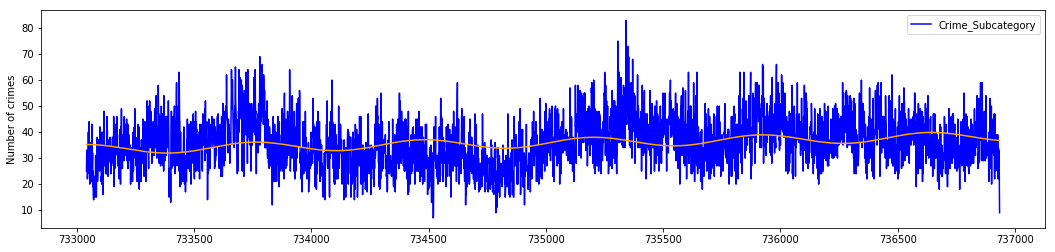

In [178]:
y = cpgroup['Crime_Subcategory']
X = cpgroup['date']

y_pred = fit3.predict(X)

plt.figure(figsize=[18,4]) 
plt.plot(X,y, c = 'blue')
plt.plot(X,y_pred, c = 'orange')
plt.ylabel('Number of crimes')
plt.legend(loc='best')

In [182]:
mask = (cp['date'] > '2016-12-31') & (cp['date'] < '2018-01-01')
cpdaily2017 = cp.loc[mask]
cpgroup2017w = cpdaily2017.groupby(['date']).count()

In [184]:
cpgroup2017w = cpgroup2017w.resample('W').sum()
cpgroup2017w['date2']=cpgroup2017w.index
cpgroup2017w['dates'] = ([x.toordinal() for x in cpgroup2017w['date2']])
cpgroup2017w['Crime_Subcategory']=cpgroup2017w['Crime Subcategory']

In [188]:
model4 = smf.ols('Crime_Subcategory ~ dates + np.sin(2*np.pi/(4)*dates)+np.cos(2*np.pi/(4)*dates)',data=cpgroup2017w)
fit4 = model4.fit()
fit4.summary()    

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Crime_Subcategory   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                 -0.028
Method:                 Least Squares   F-statistic:                    0.5241
Date:                Sat, 01 Sep 2018   Prob (F-statistic):              0.668
Time:                        22:25:15   Log-Likelihood:                -275.96
No. Observations:                  53   AIC:                             559.9
Df Residuals:                      49   BIC:                             567.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                        3.763e+04   4.34e+04      0.866      0.391   -4.97e+04    1.25e+05
dates                              -0.0507      0.059     -0.860      0.394      -0.169       0.068
np.sin(2 * np.pi / (4) * dates)    -4.7014      9.017     -0.521      0.604     -22.822      13.419
np.cos(2 * np.pi / (4) * dates)     6.8455      8.842      0.774      0.443     -10.924      24.615
==============================================================================
Omnibus:                       52.638   Durbin-Watson:                   1.249
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              384.322
Skew:                          -2.414   Prob(JB):                     3.51e-84
Kurtosis:                      15.277   Cond. No.                     5.07e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.07e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

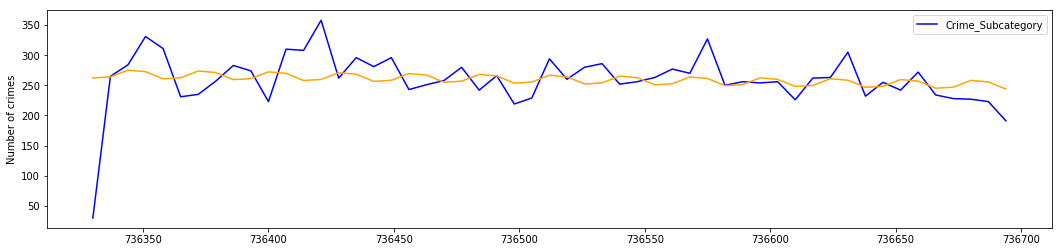

In [189]:
y = cpgroup2017w['Crime_Subcategory']
X = cpgroup2017w['dates']

y_pred = fit4.predict(X)

plt.figure(figsize=[18,4]) 
plt.plot(X,y, c = 'blue')
plt.plot(X,y_pred, c = 'orange')
plt.ylabel('Number of crimes')
plt.legend(loc='best')

In [252]:
mask = (cp['date'] > '2017-11-30') & (cp['date'] < '2018-01-01')
cpdaily2017 = cp.loc[mask]
cpgroup2017d = cpdaily2017.groupby(['date']).count()
cpgroup2017d['date2']=cpgroup2017d.index
cpgroup2017d['dates'] = ([x.toordinal() for x in cpgroup2017d['date2']])
cpgroup2017d['Crime_Subcategory']=cpgroup2017d['Crime Subcategory']
#model6 = smf.ols('Crime_Subcategory ~ dates + np.sin(2*np.pi/(.4)*dates)+np.cos(2*np.pi/(.3)*dates'),data=cpgroup2017d)
model6 = smf.ols('Crime_Subcategory ~ dates + np.sin(2*np.pi/(.1)*dates)',data=cpgroup2017d)
fit6 = model6.fit()
fit6.summary()    

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Crime_Subcategory   R-squared:                       0.133
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     2.143
Date:                Sat, 01 Sep 2018   Prob (F-statistic):              0.136
Time:                        22:45:11   Log-Likelihood:                -97.077
No. Observations:                  31   AIC:                             200.2
Df Residuals:                      28   BIC:                             204.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                         1.103e+05   8.96e+04      1.231      0.229   -7.33e+04    2.94e+05
dates                               -0.1497      0.122     -1.230      0.229      -0.399       0.100
np.sin(2 * np.pi / (.1) * dates) -6.674e+08   5.26e+08     -1.270      0.215   -1.74e+09    4.09e+08
==============================================================================
Omnibus:                        3.488   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.175   Jarque-Bera (JB):                2.041
Skew:                          -0.482   Prob(JB):                        0.360
Kurtosis:                       3.807   Cond. No.                     3.70e+14
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.23e-16. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

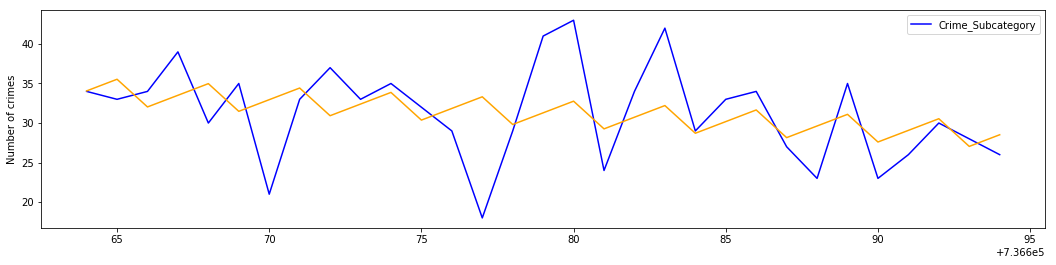

In [253]:
y = cpgroup2017d['Crime_Subcategory']
X = cpgroup2017d['dates']

y_pred = fit6.predict(X)

plt.figure(figsize=[18,4]) 
plt.plot(X,y, c = 'blue')
plt.plot(X,y_pred, c = 'orange')
plt.ylabel('Number of crimes')
plt.legend(loc='best')

In [298]:
X=np.array(cpgroup2017w['dates'])
y=np.array(cpgroup2017w['Crime_Subcategory'])
z = np.polyfit(X, y, 39)

/anaconda3/lib/python3.6/site-packages/numpy/lib/polynomial.py:583: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RankWarning: Polyfit may be poorly conditioned
  This is separate from the ipykernel package so we can avoid doing imports until


In [294]:
z

array([-0.00000000e+000,  0.00000000e+000, -0.00000000e+000,
       -0.00000000e+000,  0.00000000e+000,  0.00000000e+000,
       -0.00000000e+000, -1.20449869e-139, -2.04141817e-134,
        1.70548586e-128,  2.55185891e-122,  2.21846182e-116,
        1.54519689e-110,  8.99934002e-105,  4.10244932e-099,
        9.24960647e-094, -8.63868176e-088, -1.64358139e-081,
       -1.78961368e-075, -1.58902329e-069, -1.23723599e-063,
       -8.66084735e-058, -5.26773481e-052, -2.63374519e-046,
       -7.50485171e-041,  4.31752869e-035,  1.04460662e-028,
        1.24534003e-022,  1.15842448e-016,  9.03297308e-011,
        5.64709341e-005,  2.04092920e+001, -1.32846653e+007,
       -4.24433492e+013])

In [299]:
p = np.poly1d(z)
p

poly1d([-1.20408915e-139, -2.04695849e-134,  1.70519429e-128,
        2.55677445e-122,  2.21754777e-116,  1.54563577e-110,
        8.97194738e-105,  4.10512649e-099,  9.35705031e-094,
       -8.70391668e-088, -1.64347248e-081, -1.78594469e-075,
       -1.59320009e-069, -1.23572031e-063, -8.66072832e-058,
       -5.26771243e-052, -2.62604822e-046, -7.54556851e-041,
        4.32374315e-035,  1.04651043e-028,  1.24459483e-022,
        1.16002640e-016,  9.02750133e-011,  5.62539843e-005,
        2.04834069e+001, -1.33062232e+007, -4.24157492e+013])

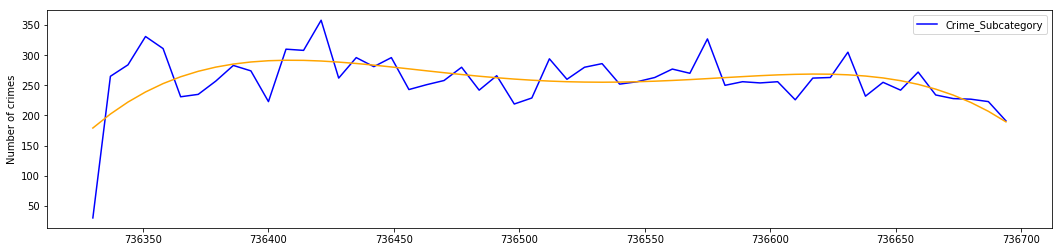

In [300]:
y = cpgroup2017w['Crime_Subcategory']
X = cpgroup2017w['dates']

y_pred = p(X)

plt.figure(figsize=[18,4]) 
plt.plot(X,y, c = 'blue')
plt.plot(X,y_pred, c = 'orange')
plt.ylabel('Number of crimes')
plt.legend(loc='best')

Text(0.5,1,'RSS: 106682.5039')

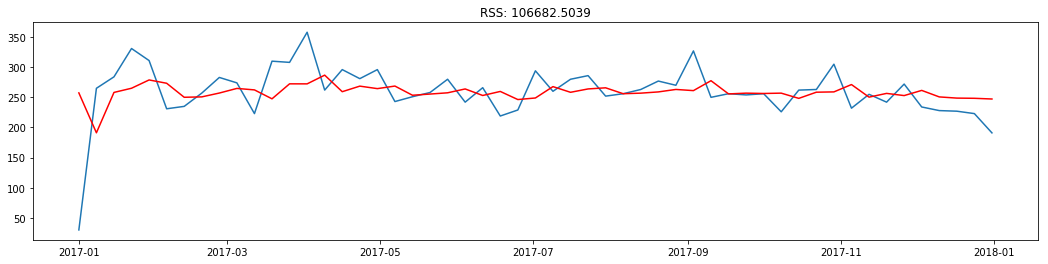

In [306]:
model = ARIMA(cpgroup2017w['Crime_Subcategory'], order=(1, 0, 1))  
results_ARIMA = model.fit(disp=-1)  
plt.figure(figsize=[18,4])
plt.plot(cpgroup2017w['Crime_Subcategory'])
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-cpgroup2017w['Crime_Subcategory'])**2))

In [307]:
mask = (cp['date'] > '2016-12-31') & (cp['date'] < '2018-01-01')
cpdaily2017 = cp.loc[mask]
cpgroup2017m = cpdaily2017.groupby(['date']).count()
cpgroup2017m = cpgroup2017m.resample('M').sum()
cpgroup2017m['date2']=cpgroup2017m.index
cpgroup2017m['dates'] = ([x.toordinal() for x in cpgroup2017m['date2']])
cpgroup2017m['Crime_Subcategory']=cpgroup2017m['Crime Subcategory']

In [311]:
model = ARIMA(cpgroup2017m['Crime_Subcategory'], order=(1, 0, 1))  
results_ARIMA = model.fit(disp=-1)  
plt.figure(figsize=[18,4])
plt.plot(cpgroup2017m['Crime_Subcategory'])
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-cpgroup2017m['Crime_Subcategory'])**2))

ValueError: The computed initial AR coefficients are not stationary
You should induce stationarity, choose a different model order, or you can
pass your own start_params.

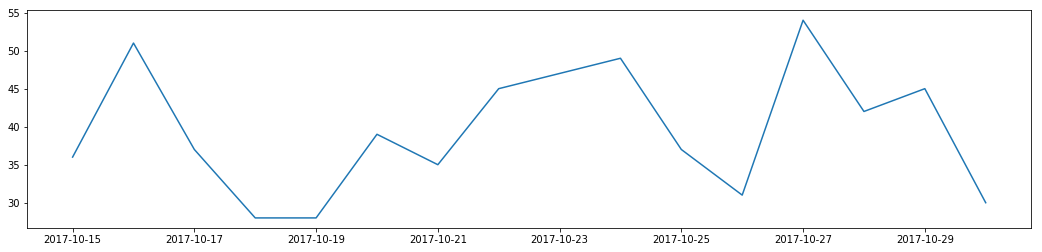

In [318]:
mask = (cp['date'] > '2017-10-14') & (cp['date'] < '2017-10-31')
cpdaily2017 = cp.loc[mask]
cpgroup2017d = cpdaily2017.groupby(['date']).count()
cpgroup2017d['date2']=cpgroup2017d.index
cpgroup2017d['dates'] = ([x.toordinal() for x in cpgroup2017d['date2']])
cpgroup2017d['Crime_Subcategory']=cpgroup2017d['Crime Subcategory']
# model = ARIMA(cpgroup2017d['Crime_Subcategory'], order=(1, 0, 1))  
# results_ARIMA = model.fit(disp=-1)  
plt.figure(figsize=[18,4])
plt.plot(cpgroup2017d['Crime_Subcategory'])
# plt.plot(results_ARIMA.fittedvalues, color='red')
# plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-cpgroup2017d['Crime_Subcategory'])**2))